#### 交叉均线策略

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yfinance
plt.style.use("seaborn")

In [36]:
data = pd.read_csv("eurusd_d.csv",parse_dates=["Date"],index_col="Date",usecols = ["Open","Date"])

In [37]:
data

,Open
Date,
2004-01-05,1.26080
2004-01-06,1.26730
2004-01-07,1.27260
2004-01-08,1.26290
2004-01-09,1.27710
...,...
2024-02-09,1.07772
2024-02-12,1.07853
2024-02-13,1.07725


In [38]:
sma_s = 50
sma_l = 200

In [39]:
data.Open.rolling(50).mean()

Date
2004-01-05         NaN
2004-01-06         NaN
2004-01-07         NaN
2004-01-08         NaN
2004-01-09         NaN
                ...   
2024-02-09    1.089450
2024-02-12    1.089236
2024-02-13    1.089014
2024-02-14    1.088766
2024-02-15    1.088627
Name: Open, Length: 5217, dtype: float64

In [40]:
data["SMA_S"] = data.Open.rolling(sma_s).mean()

In [41]:
data["SMA_L"] = data.Open.rolling(sma_l).mean()

In [42]:
data

,Open,SMA_S,SMA_L
Date,,,
2004-01-05,1.26080,NaN,NaN
2004-01-06,1.26730,NaN,NaN
2004-01-07,1.27260,NaN,NaN
2004-01-08,1.26290,NaN,NaN
2004-01-09,1.27710,NaN,NaN
...,...,...,...
2024-02-09,1.07772,1.089450,1.083458
2024-02-12,1.07853,1.089236,1.083343
2024-02-13,1.07725,1.089014,1.083218


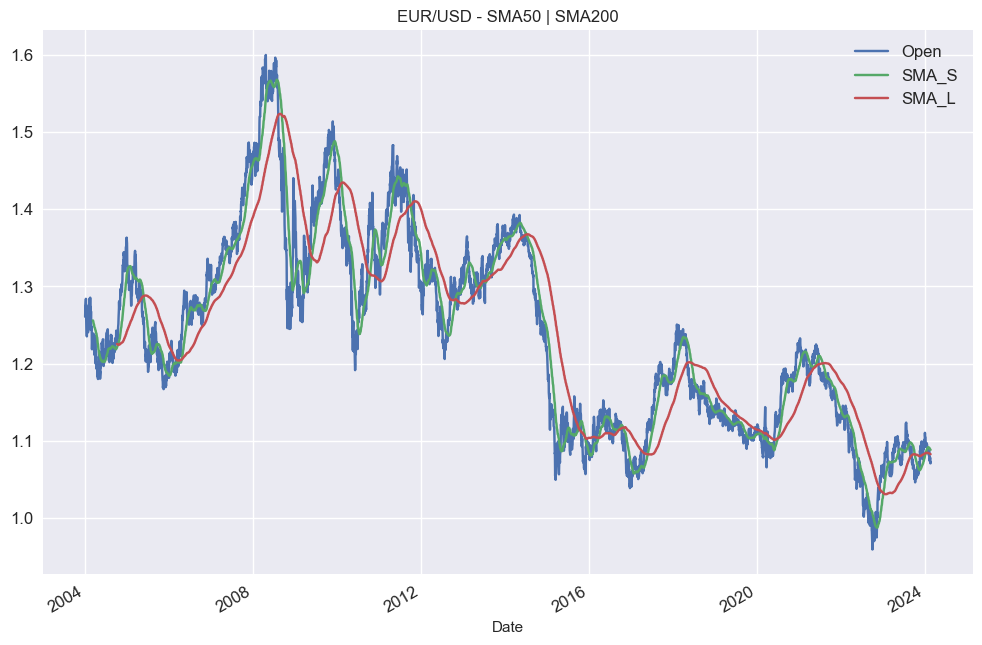

In [43]:
data.plot(figsize = (12,8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [44]:
data.dropna(inplace=True)

In [45]:
data

,Open,SMA_S,SMA_L
Date,,,
2004-10-08,1.22850,1.221470,1.225615
2004-10-11,1.24170,1.222170,1.225520
2004-10-12,1.23820,1.222892,1.225375
2004-10-13,1.23220,1.223446,1.225172
2004-10-14,1.23360,1.224022,1.225026
...,...,...,...
2024-02-09,1.07772,1.089450,1.083458
2024-02-12,1.07853,1.089236,1.083343
2024-02-13,1.07725,1.089014,1.083218


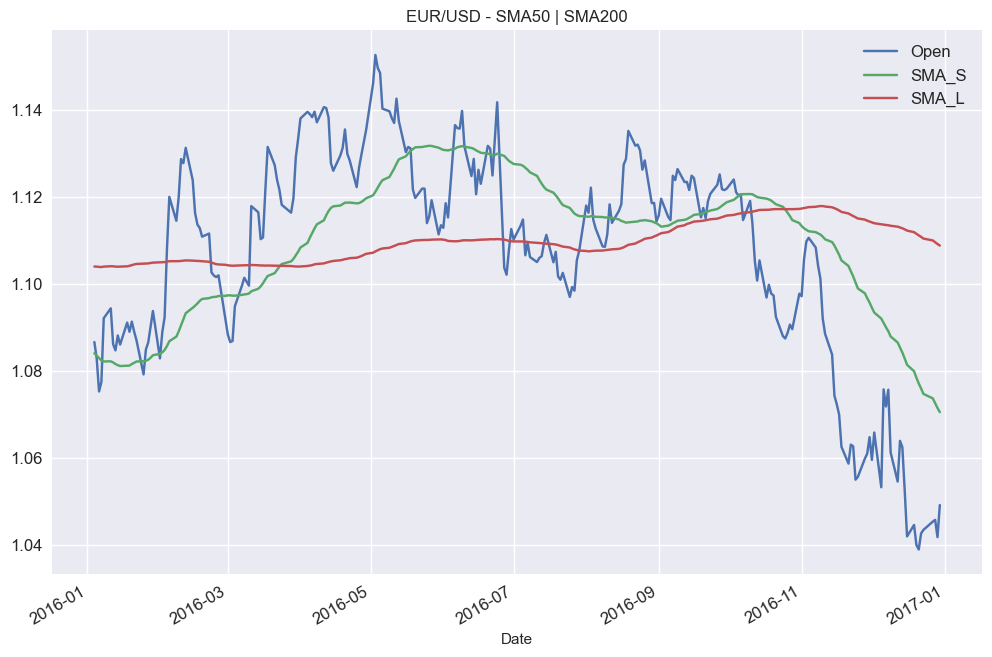

In [46]:
data.loc["2016"].plot(figsize = (12,8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)

In [47]:
data["position"] = np.where(data["SMA_S"] > data["SMA_L"],1,-1)

In [48]:
data

,Open,SMA_S,SMA_L,position
Date,,,,
2004-10-08,1.22850,1.221470,1.225615,-1
2004-10-11,1.24170,1.222170,1.225520,-1
2004-10-12,1.23820,1.222892,1.225375,-1
2004-10-13,1.23220,1.223446,1.225172,-1
2004-10-14,1.23360,1.224022,1.225026,-1
...,...,...,...,...
2024-02-09,1.07772,1.089450,1.083458,1
2024-02-12,1.07853,1.089236,1.083343,1
2024-02-13,1.07725,1.089014,1.083218,1


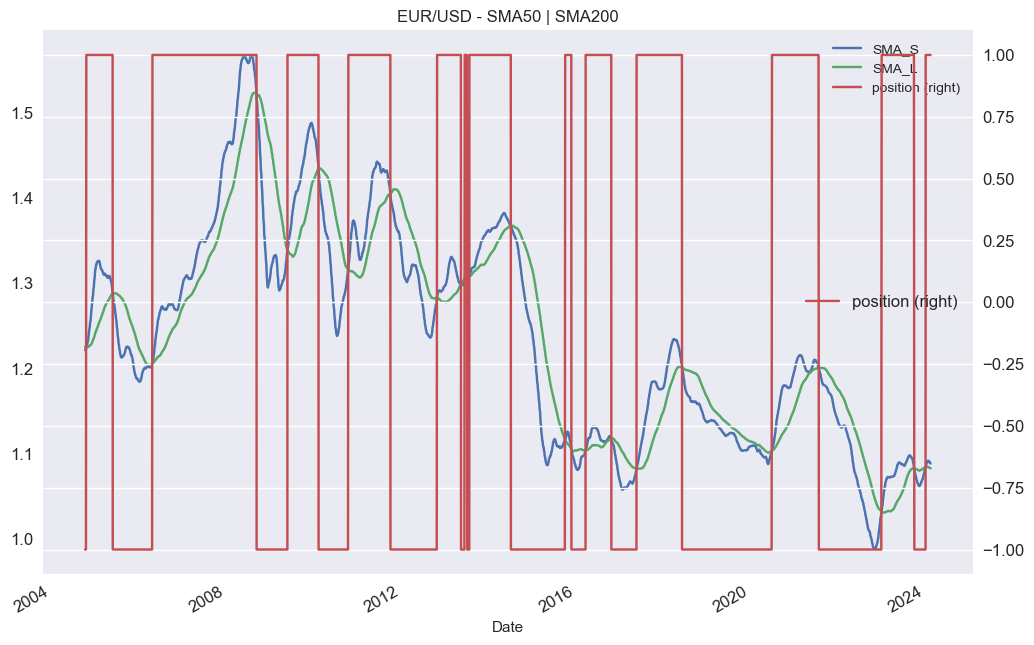

In [49]:
data.loc[:,["SMA_S","SMA_L","position"]].plot(figsize = (12,8) , secondary_y = "position",title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)

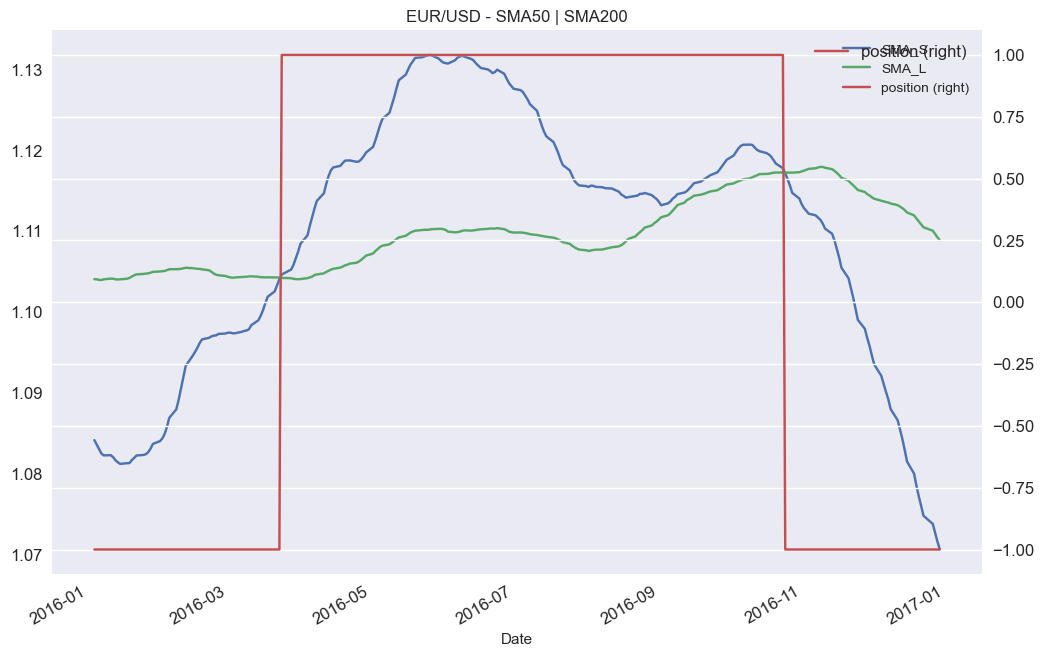

In [34]:
data.loc["2016",["SMA_S","SMA_L","position"]].plot(figsize = (12,8) , secondary_y = "position",title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)

In [50]:
data

,Open,SMA_S,SMA_L,position
Date,,,,
2004-10-08,1.22850,1.221470,1.225615,-1
2004-10-11,1.24170,1.222170,1.225520,-1
2004-10-12,1.23820,1.222892,1.225375,-1
2004-10-13,1.23220,1.223446,1.225172,-1
2004-10-14,1.23360,1.224022,1.225026,-1
...,...,...,...,...
2024-02-09,1.07772,1.089450,1.083458,1
2024-02-12,1.07853,1.089236,1.083343,1
2024-02-13,1.07725,1.089014,1.083218,1


In [51]:
data.Open

Date
2004-10-08    1.22850
2004-10-11    1.24170
2004-10-12    1.23820
2004-10-13    1.23220
2004-10-14    1.23360
               ...   
2024-02-09    1.07772
2024-02-12    1.07853
2024-02-13    1.07725
2024-02-14    1.07107
2024-02-15    1.07282
Name: Open, Length: 5018, dtype: float64

In [52]:
data["returns"] = np.log(data.Open.div(data.Open.shift(1)))

In [53]:
data

,Open,SMA_S,SMA_L,position,returns
Date,,,,,
2004-10-08,1.22850,1.221470,1.225615,-1,NaN
2004-10-11,1.24170,1.222170,1.225520,-1,0.010687
2004-10-12,1.23820,1.222892,1.225375,-1,-0.002823
2004-10-13,1.23220,1.223446,1.225172,-1,-0.004858
2004-10-14,1.23360,1.224022,1.225026,-1,0.001136
...,...,...,...,...,...
2024-02-09,1.07772,1.089450,1.083458,1,0.000483
2024-02-12,1.07853,1.089236,1.083343,1,0.000751
2024-02-13,1.07725,1.089014,1.083218,1,-0.001188


In [54]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [55]:
data

,Open,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2004-10-08,1.22850,1.221470,1.225615,-1,NaN,NaN
2004-10-11,1.24170,1.222170,1.225520,-1,0.010687,-0.010687
2004-10-12,1.23820,1.222892,1.225375,-1,-0.002823,0.002823
2004-10-13,1.23220,1.223446,1.225172,-1,-0.004858,0.004858
2004-10-14,1.23360,1.224022,1.225026,-1,0.001136,-0.001136
...,...,...,...,...,...,...
2024-02-09,1.07772,1.089450,1.083458,1,0.000483,0.000483
2024-02-12,1.07853,1.089236,1.083343,1,0.000751,0.000751
2024-02-13,1.07725,1.089014,1.083218,1,-0.001188,-0.001188


In [58]:
data.dropna(inplace=True)

In [60]:
data[["returns","strategy"]].sum() # aabsoulte performance

returns    -0.135503
strategy    0.187897
dtype: float64

In [61]:
data[["returns","strategy"]].sum().apply(np.exp) # aabsoulte performance

returns     0.873276
strategy    1.206710
dtype: float64

In [63]:
data[["returns","strategy"]].mean() * 252 # anualized return

returns    -0.006806
strategy    0.009438
dtype: float64

In [64]:
data[["returns","strategy"]].std() * np.sqrt(252) # anualized return

returns     0.091984
strategy    0.091983
dtype: float64

In [70]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [71]:
data

,Open,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-11,1.24170,1.222170,1.225520,-1,0.010687,-0.010687,1.010745,0.989369
2004-10-12,1.23820,1.222892,1.225375,-1,-0.002823,0.002823,1.007896,0.992166
2004-10-13,1.23220,1.223446,1.225172,-1,-0.004858,0.004858,1.003012,0.996997
2004-10-14,1.23360,1.224022,1.225026,-1,0.001136,-0.001136,1.004151,0.995866
2004-10-15,1.23820,1.224676,1.224831,-1,0.003722,-0.003722,1.007896,0.992166
...,...,...,...,...,...,...,...,...
2024-02-09,1.07772,1.089450,1.083458,1,0.000483,0.000483,0.877265,1.212221
2024-02-12,1.07853,1.089236,1.083343,1,0.000751,0.000751,0.877924,1.213132
2024-02-13,1.07725,1.089014,1.083218,1,-0.001188,-0.001188,0.876882,1.211693


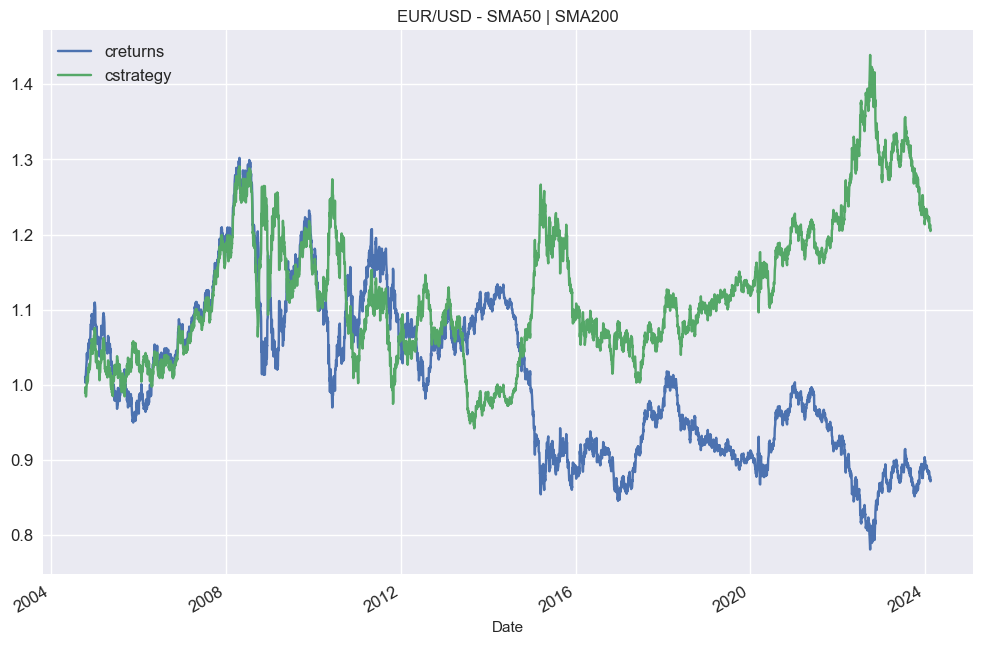

In [72]:
data[["creturns","cstrategy"]].plot(figsize = (12,8) , title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()